In [8]:
import torch
import numpy as np
import os, sys

In [9]:
input_dir = "gh_exported_64/tree41"

In [10]:
fs = os.listdir(input_dir)
fs.sort()
filenames = []

### add filename in fs to filenames
for filename in fs:
    # if(filename[-4:] == ".png"):
    #     print(filename)
    if("pattern_1" in filename):
        # print(filename, '_'.join(filename.split("_")[:3]))
        filenames.append('_'.join(filename.split("_")[:3]))
    else:
        continue

In [11]:
filename = filenames[1]
filename

'tree41_10_64'

In [37]:
try:
    path = os.path.join(input_dir, filename)
    path_1 = path + "_pattern_1.txt"
    path_2 = path +  "_pattern_2.txt"
    all_txt = open(path_1, 'r')
    mask_txt = open(path_2, 'r')
    # size = mask_txt.readline(0)
    vox_all = all_txt.readlines()[1].split(",")
    vox_mask = mask_txt.readlines()[1].split(",")
except:
    print("failed to open" , filename,  path_1, path_2)
            

In [40]:
# all_np = []
# for vox in vox_all:
#     # print(i, vox)
#     if(vox== '0'):
#         all_np.append(0)
#     elif(vox=='1'):
#         all_np.append(1)
#     else:
#         print(vox)
# print(all_np)

In [42]:
# torch.cuda.is_available()
all_np = np.zeros(64**3, dtype=np.int8)
all_np.shape

(262144,)

In [43]:
# all_np.shape
vox_all_np = np.array(vox_all)

In [89]:
print(len(np.where(vox_all_np == '1')[0]))
all_np[np.where(vox_all_np == '1')] = 1

# all_np[np.where(vox_all_np == '1')]

26862


In [78]:
vox_mask = np.array(vox_mask)

In [80]:
pattern_2 = np.zeros(len(np.where(vox_all_np == '1')[0]), dtype=np.uint8)
pattern_2[np.where(vox_mask == '1')] = 1
print(len(pattern_2))
print(pattern_2[np.where(vox_mask == '1')])

26862
[1 1 1 ... 1 1 1]


In [93]:
culled_list = np.where(all_np.ravel() == 1) # 
len(culled_list)

(array([ 30463,  30527,  30590, ..., 238976, 239040, 239041], dtype=int64),)

In [136]:
size = 64

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [146]:
# for i, vox in enumerate(masked_vol):
#     if any(i == c for c in culled_list):
#         if(pattern_2[culled_list_index] == 1):
#             # print("missing parts" , i, "masked vol", masked_vol[i])
#             missing_parts[i] = 1
#             masked_vol[i] = 0
#         culled_list_index +=1

In [177]:
masked_vol = all_np.ravel().copy()
missing_parts = np.zeros(size**3, dtype=np.uint8).ravel()
vol_indicies = np.where(all_np.ravel() == 1)
# print(vol_indicies)
culled_vol_idx = np.delete(vol_indicies, np.where(pattern_2 == 0))
# print(culled_vol_idx)
masked_vol[culled_vol_idx] = 0
missing_parts[culled_vol_idx] = 1
print(np.where(missing_parts == 1))

(array([ 30463,  30527,  30590, ..., 238976, 239040, 239041], dtype=int64),)
[ 51185  51186  51247 ... 210703 210766 210830]
(array([ 51185,  51186,  51247, ..., 210703, 210766, 210830], dtype=int64),)


In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<Figure size 432x288 with 0 Axes>

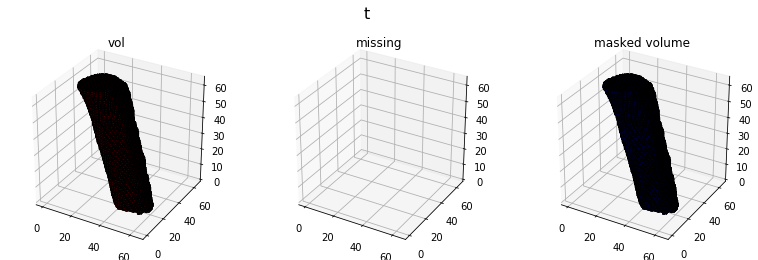

In [154]:
all_np = np.reshape(all_np, (size,size,size))
missing_parts = np.reshape(missing_parts, (size,size,size))
masked_vol = np.reshape(masked_vol, (size,size,size))

fig = plt.figure()
fig = plt.figure(figsize=plt.figaspect(0.3))
fig.suptitle(filename[0], fontsize=16)

ax1 = fig.add_subplot(131, title='vol', projection='3d') 
ax2 = fig.add_subplot(132, title='missing', projection='3d')
ax3 = fig.add_subplot(133, title='masked volume', projection='3d') 
# ax1 = fig.gca(projection='3d')
ax1.voxels(all_np, facecolors='red', edgecolor='k')
ax2.voxels(missing_parts, facecolors='green', edgecolor='k')
ax3.voxels(masked_vol, facecolors='blue', edgecolor='k')

plt.show()